# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [51]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")



In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()

C:\Users\pamel\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


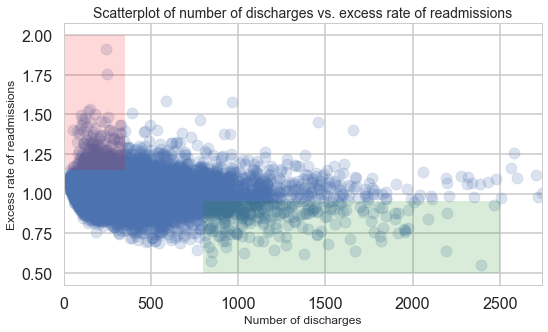

In [58]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet



## A. Do you agree with the above analysis and recommendations? Why or why not?
I don't entirely agree with the above analysis and recommendation because of missing thorough statistical analysis that can support the conclusion.  I need to do my own statistical analysis first to be more exact on which parts I agree or disagree with the above analysis. The missing data was handled properly above by droppung rows with null values (except for Footnote columns). 


In [6]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [7]:
hospital_read_df.shape

(16860, 12)

In [8]:
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [9]:
missing=hospital_read_df[hospital_read_df['Number of Discharges']=='Not Available']
missing.isnull().sum()

Hospital Name                    0
Provider Number                  0
State                            0
Measure Name                     0
Number of Discharges             0
Footnote                      2234
Excess Readmission Ratio      3048
Predicted Readmission Rate    3048
Expected Readmission Rate     3048
Number of Readmissions        5282
Start Date                       0
End Date                         0
dtype: int64

In [10]:
new=hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
new.shape

(11578, 12)

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:


## 1. Setup an appropriate hypothesis test.
I.

Ho: There is no significant difference between "number of discharges" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1

H1: There is significant difference between "number of discharges" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1


II. 

Ho: There is no significant difference between "number of readmissions" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1

H1: There is significant difference between "number of readmissions" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1

In [11]:
new=new[new['Number of Readmissions'].notnull()]

In [12]:
new.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [13]:
new['Number of Discharges']=pd.to_numeric(new['Number of Discharges'])

In [14]:
new.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [68]:
np.corrcoef(new['Number of Discharges'], new['Excess Readmission Ratio'])

array([[ 1.        , -0.09739794],
       [-0.09739794,  1.        ]])

In [69]:
np.corrcoef(new['Number of Discharges'], new['Number of Readmissions'])

array([[ 1.        ,  0.79127241],
       [ 0.79127241,  1.        ]])

In [15]:
# hospitals with excess readmission ration<=1
hosp1=new[new['Excess Readmission Ratio']<=1]
hosp1.shape

(5558, 12)

In [16]:
h1=hosp1.describe()
h1

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,5558.000000,5558.000000,0.0,5558.000000,5558.000000,5558.000000,5558.000000
mean,260906.968694,381.295250,NaN,0.937418,16.757521,17.775873,56.253688
std,159495.580213,322.753963,NaN,0.054024,4.980086,5.085959,51.592411
min,10001.000000,51.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110089.500000,168.000000,NaN,0.912900,15.400000,16.400000,22.000000
50%,250069.000000,294.000000,NaN,0.950550,17.800000,18.800000,39.000000
75%,390167.000000,489.000000,NaN,0.977100,20.100000,21.300000,72.000000
max,670077.000000,6793.000000,NaN,1.000000,26.400000,27.000000,546.000000


In [17]:
# hospitals with excess readmission ration>1
hosp2=new[new['Excess Readmission Ratio']>1]
hosp2.shape

(5939, 12)

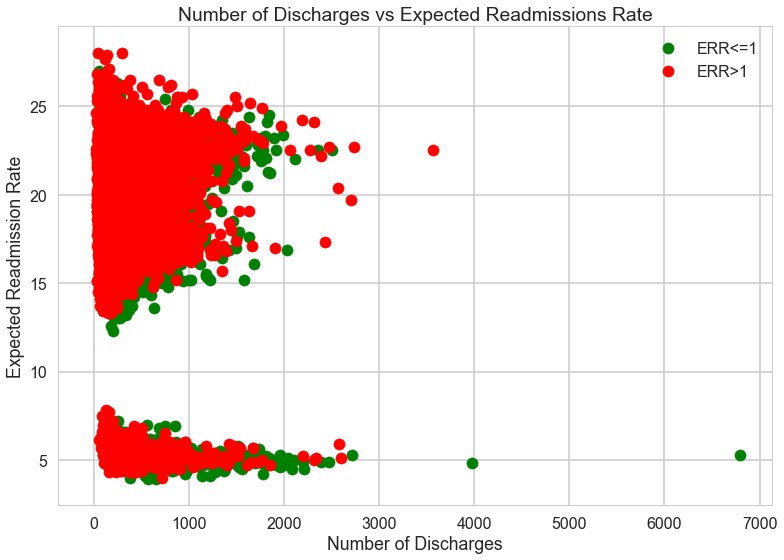

In [63]:
plt.scatter(hosp1['Number of Discharges'], hosp1['Expected Readmission Rate'], c='g', label="ERR<=1")
plt.scatter(hosp2['Number of Discharges'], hosp2['Expected Readmission Rate'], c='r', label='ERR>1')
plt.xlabel('Number of Discharges')
plt.ylabel('Expected Readmission Rate')
plt.title('Number of Discharges vs Expected Readmissions Rate')
plt.legend()

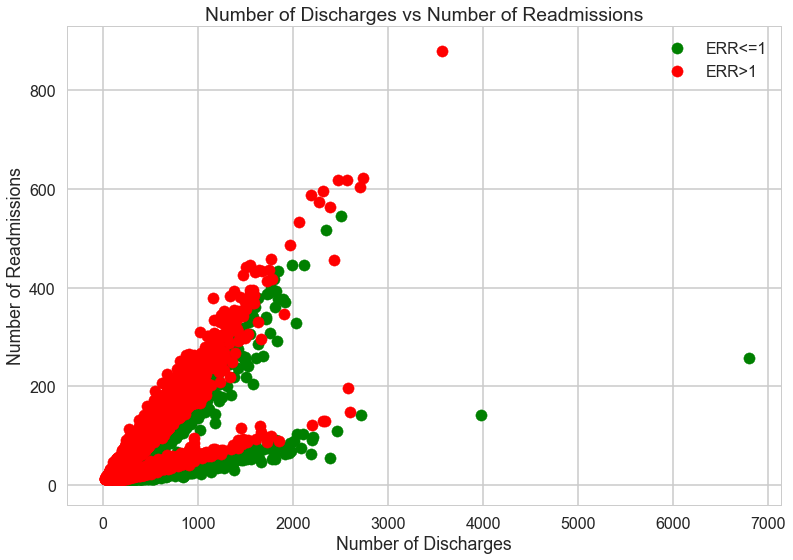

In [52]:
plt.scatter(hosp1['Number of Discharges'], hosp1['Number of Readmissions'], c='g', label="ERR<=1")
plt.scatter(hosp2['Number of Discharges'], hosp2['Number of Readmissions'], c='r', label='ERR>1')
plt.xlabel('Number of Discharges')
plt.ylabel('Number of Readmissions')
plt.title('Number of Discharges vs Number of Readmissions')
plt.legend()

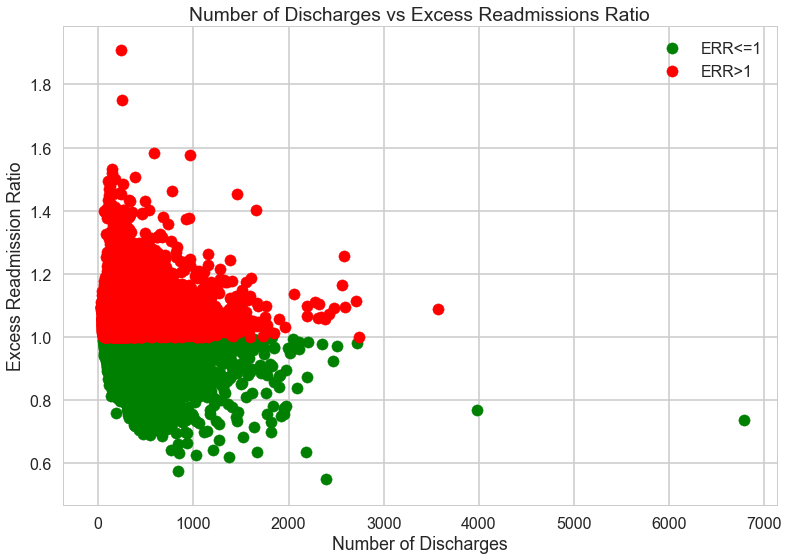

In [53]:
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1")
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1')
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

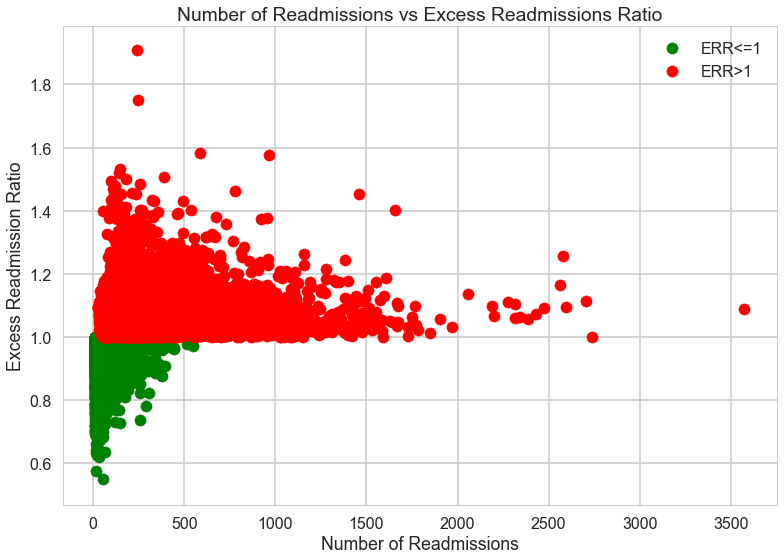

In [54]:
plt.scatter(hosp1['Number of Readmissions'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1")
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1')
plt.xlabel('Number of Readmissions')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Readmissions vs Excess Readmissions Ratio')
plt.legend()

<function matplotlib.pyplot.show>

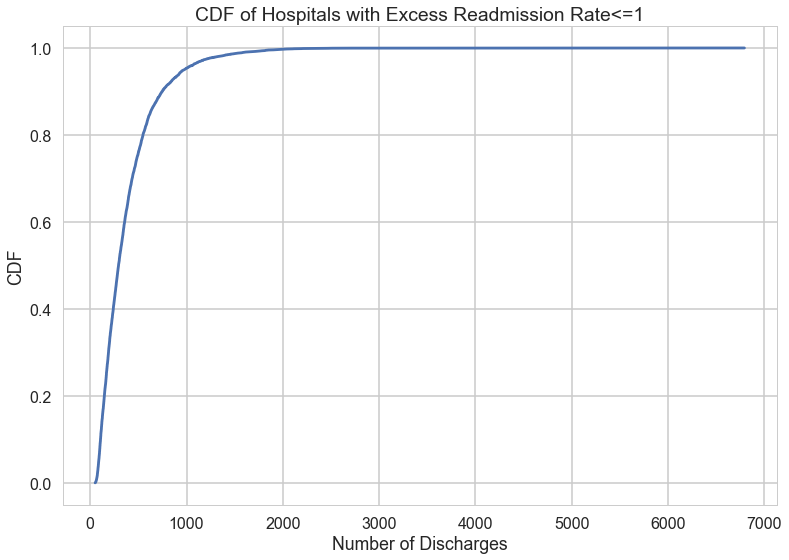

In [55]:
x1=np.sort(hosp1['Number of Discharges'])
y1=np.linspace(0., 1., len(x1))
distCDF1=pd.Series(y1, index=x1)

x2=np.sort(hosp1['Number of Discharges'])
y2=np.linspace(0., 1., len(x2))
distCDF2=pd.Series(y2, index=x2)

plt.plot(distCDF1)

plt.xlabel('Number of Discharges')

plt.ylabel('CDF')
plt.title('CDF of Hospitals with Excess Readmission Rate<=1' )
plt.show



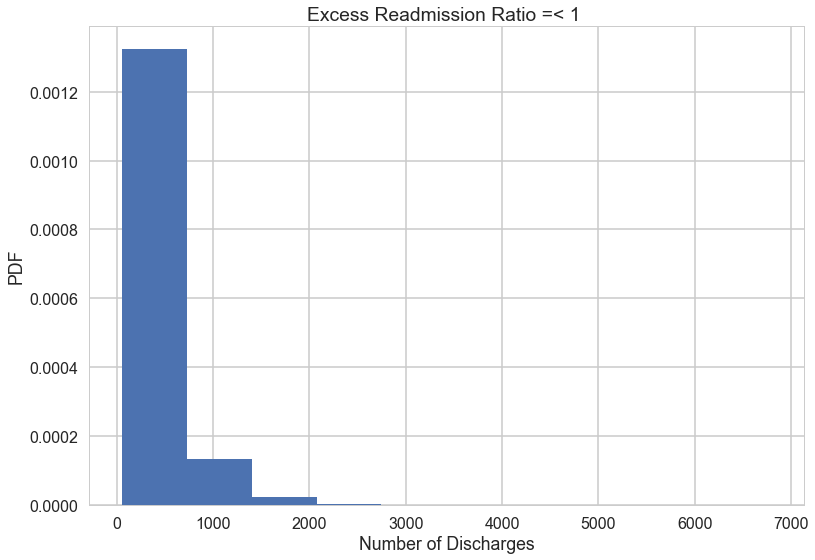

In [62]:
plt.hist(hosp1['Number of Discharges'],bins=10, normed=True)
plt.xlabel('Number of Discharges')
plt.ylabel('PDF')
plt.title('Excess Readmission Ratio =< 1 ')
plt.show()

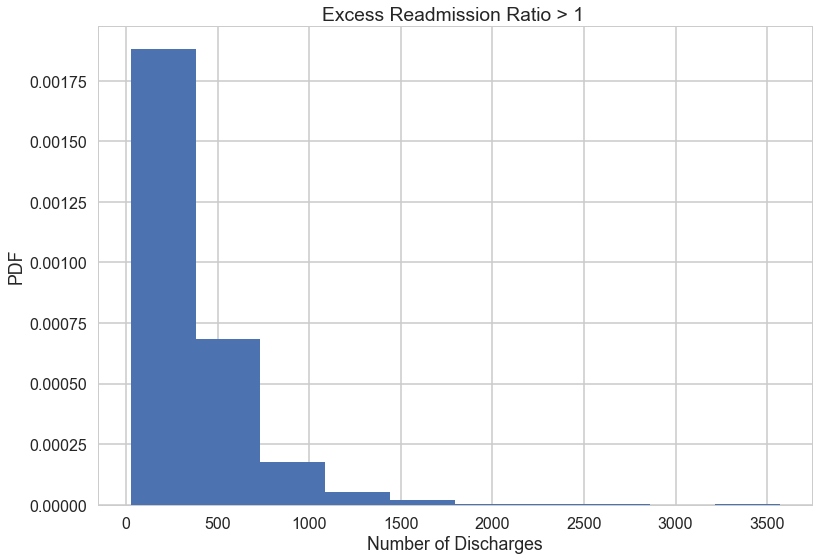

In [61]:
plt.hist(hosp2['Number of Discharges'],bins=10, normed=True)
plt.xlabel('Number of Discharges')
plt.ylabel('PDF')
plt.title('Excess Readmission Ratio > 1 ')
plt.show()

In [21]:
##hosp1
P1=5558/(5558+5939)
P1

0.4834304601200313

In [22]:
#hosp2
P2=5939/(5558+5939)
P2

0.5165695398799687

## Using "Number of Discharges"

In [23]:
##Difference in mean of # discharges
mean_dis_diff=381.295250-350.652635
mean_dis_diff

30.642615000000035

In [24]:
#standard deviation for difference in mean of # of discharges
std_dis_diff=np.sqrt((322.753963**2/5558) + (294.309313**2/5939))
std_dis_diff

5.7729524950854332

In [25]:
##Using 0.05 significance level
moe=1.96*std_dis_diff
moe

11.314986890367448

In [26]:
## confidence interval for difference in number of discharges
ci = mean_dis_diff + np.array([-1, 1]) * moe
ci

array([ 19.32762811,  41.95760189])

In [27]:
## degrees of freedom
n1=5558
n2=5939
H1=(322.753963**2)/n1
H2=(294.309313**2)/n2

DF=((H1+H2)**2)/(((H1**2)/n1)+((H2**2)/n2))
DF

11217.039092559779

In [28]:
# t_val
t_val=(mean_dis_diff-0)/std_dis_diff
t_val

5.3079624379529138

In [29]:
p_value = stats.t.sf(np.abs(t_val), DF)*2  # two-sided pvalue
p_value


1.1297252848786862e-07

## p_value <0.05 and also <0.01 which means I. Ho can be rejected and I. H1 will be accepted
H1: There is significant difference between "number of discharges" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1

There is 95% confidence that this  difference in mean of "number discharges" is 19.33 to 42.96.  
There is 99.95% confidence that this difference in mean of number of discharge is 11.48 to 49.80.

In [30]:
##Using 0.01 significance level: DF, t_val and p_value are the same
moe_2=3.32*std_dis_diff
moe_2

19.166202283683639

In [31]:
## confidence interval for difference in number of discharges 
ci_2 = mean_dis_diff + np.array([-1, 1]) * moe_2
ci_2

array([ 11.47641272,  49.80881728])

## Using "Number of Readmissions"

In [32]:
hosp1.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,5558.000000,5558.000000,0.0,5558.000000,5558.000000,5558.000000,5558.000000
mean,260906.968694,381.295250,NaN,0.937418,16.757521,17.775873,56.253688
std,159495.580213,322.753963,NaN,0.054024,4.980086,5.085959,51.592411
min,10001.000000,51.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110089.500000,168.000000,NaN,0.912900,15.400000,16.400000,22.000000
50%,250069.000000,294.000000,NaN,0.950550,17.800000,18.800000,39.000000
75%,390167.000000,489.000000,NaN,0.977100,20.100000,21.300000,72.000000
max,670077.000000,6793.000000,NaN,1.000000,26.400000,27.000000,546.000000


In [33]:
hosp2.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,5939.000000,5939.000000,0.0,5939.000000,5939.000000,5939.000000,5939.000000
mean,254450.086715,350.652635,NaN,1.073093,19.132362,17.949756,70.540327
std,149168.664049,294.309313,NaN,0.068862,5.688989,5.380648,65.372409
min,10001.000000,25.000000,NaN,1.000100,4.400000,4.000000,11.000000
25%,110186.000000,151.000000,NaN,1.025800,17.600000,16.800000,27.000000
50%,250031.000000,269.000000,NaN,1.056200,20.300000,19.100000,51.000000
75%,370052.500000,460.500000,NaN,1.097800,22.800000,21.500000,92.000000
max,670082.000000,3570.000000,NaN,1.909500,32.800000,28.000000,879.000000


In [34]:
read_diff_mean=56.253688-70.540327
read_diff_mean

-14.286639000000008

In [35]:
read_diff_std=np.sqrt((51.592411**2/n1)+(65.372409**2)/n2)
read_diff_std

1.0947526809164672

In [36]:
##Using 0.05 significance level
moe_read1=1.96*read_diff_std
moe_read1

2.1457152545962757

In [37]:
## confidence interval for difference in number of readmissions
ci_read1 = abs(read_diff_mean) + np.array([-1, 1]) * moe_read1
ci_read1

array([ 12.14092375,  16.43235425])

In [38]:
## degrees of freedom
R1=(51.592411**2)/n1
R2=(65.372409**2)/n2

DF2=((R1+R2)**2)/(((R1**2)/n1)+((R2**2)/n2))
DF2

11182.287787269514

In [39]:
# t_val
t_val_r=(read_diff_mean-0)/read_diff_std
t_val_r

-13.050106429554495

In [40]:
p_value_r = stats.t.sf(np.abs(t_val_r), DF2)*2  # two-sided pvalue
p_value_r


1.2149214321936578e-38

## p_value <0.05 and also <0.01 which means I. Ho can be rejected and I. H1 will be accepted¶

H1: There is significant difference between "number of readmissions" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1


There is 95% confidence that this difference in mean of "number discharges" is 12.14 to 16.43.
There is 99.95% confidence that this difference in mean of number of discharge is 10.65 to 17.93.

In [41]:
##Using 0.01 significance level: DF, t_val and p_value are the same
moe_read2=3.32*read_diff_std
moe_read2

3.634578900642671

In [42]:
## confidence interval for difference in number of readmissions
ci_read2 = abs(read_diff_mean) + np.array([-1, 1]) * moe_read2
ci_read2

array([ 10.6520601,  17.9212179])